# Metodo de Monte Carlo acierto y error

En este caso se utilizará el método de Monte Carlo para estimar integrales definidas.

**PASO 1**. Genere una secuencia $\{U_j\}_{j=1}^{2N}$ de $2N$ números aleatorios.

In [5]:
from random import random

"""
  Esta funcion genera un par de numeros aleatorios con distribucion uniforme
  con a=0 y b=1
"""
def uniforme():
  return (random(),random())

# Pequeña prueba del codigo

for i in range(10):
  print(uniforme())


(0.37102090930765985, 0.6792554976799093)
(0.1475945405844339, 0.05391651455411772)
(0.8728611021641494, 0.22057089435679345)
(0.971628614086597, 0.8260268896884992)
(0.21342843138085565, 0.5375162296764966)
(0.5637899225453183, 0.6442774031099419)
(0.13447695265587756, 0.1629553291491912)
(0.6939070897825773, 0.6308989438393382)
(0.22287032901523207, 0.6064839501992879)
(0.08619185143644181, 0.5578215285951461)


**PASO 2**. Organice los números aleatorios en $N$ pares $(U_1,U_1^´),(U_2,U_2^´),...,(U_N,U_N^´)$ de cualquier forma tal que cada número aleatorio $U_j$ se use exactamente una vez.

In [6]:
N = 5 #por ejemplo

def lista(n):
  l = []
  for n in range(n):
    l.append(uniforme())
  return l

print(lista(N))

[(0.29196862763248155, 0.08767262902416317), (0.12634468991819925, 0.24460541229165422), (0.1930150291011543, 0.28755630849668057), (0.23039290293712988, 0.3926244445511272), (0.15666539595203066, 0.9849436183012548)]


**PASO 3**. Calcule $X_i=a+U_i(b-a)\hspace{0.5cm}$ y $\hspace{0.5cm}g(X_i) , \hspace{0.5cm}i=1,2,...,N$

In [7]:
X = lambda a,b,u: a+u[0]*(b-a)

a = 0
b = 1

v = lista(N)

# pequeña prueba del codigo
for j in v:
  print(X(a,b,j))


0.9495311651812512
0.9847932716348462
0.667552991434356
0.8467004336695925
0.14372987438913887


A modo de ejemplo se va a utilizar la función $g(x)=-x^2+x$

In [8]:
import numpy as np

g = np.poly1d([-1,1,0])

for j in lista(N):
  print(X(a,b,j),g(X(a,b,j)))


0.8419669275992715 0.1330586204283146
0.5215338065533629 0.24953629517532233
0.4223958447367653 0.24397759508587977
0.9812867602088301 0.018363054447688074
0.5924956929174406 0.24144454679172253


Grafica de la función

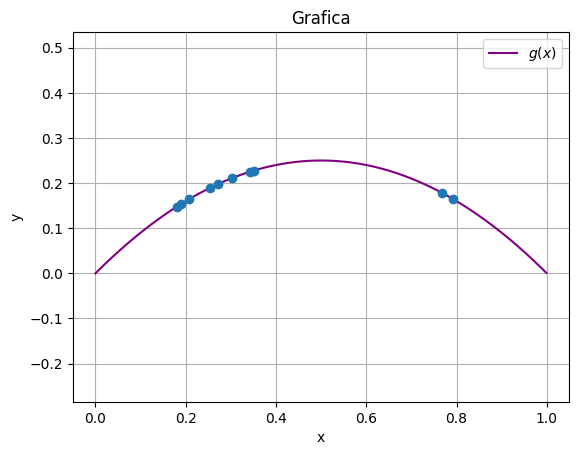

In [12]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x = []
for i in lista(10):
  x.append(i[0])

y = ( g(i) for i in x )
x1 = np.arange(a,b,0.001)

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,g(x1),color="purple",label="$g(x)$")
plt.plot(x,list(y),"o")
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid()
plt.show()

**PASO 4**. Cuente el número de casos $N_H$ para los cuales $g(X_i)>cU_i^{'}$

In [15]:
c = 1

def NH(a,b,c,f,l):
  n = 0
  for i in l:
    if f(X(a,b,i))>c*i[1]:
      n+=1
  return n

print("N_H = {0}".format(NH(a,b,c,g,lista(100))))

N_H = 12


**PASO 5**. Estime la integral $I$ por $\theta_1=c(b-a)\dfrac{N_H}{N}$

In [17]:
def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

print(I(0,1,0.5,1000,g))

0.1785


Use el método de Acierto y Error para estimar las integrales:

$(a) \int_{0}^{1}e^{e^x}dx$

$(b) \int_0^1\sqrt{(1-x^2)^3}dx$

## Solución

$$(a) \int_{0}^{1}e^{e^x}dx$$

**Paso 1.** Intervalo de integracion.

El intervalo de integración va de $0\leqslant x \leqslant 1$ por lo tanto $a=0,b=1$ y se propone una cota de $c=100$ y $N=500000$ corremos el codigo para ver el resultado que arroja.

In [19]:
from math import exp

def I(a,b,c,n,f):
  s = 0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      s+=1
  return c*(b-a)*(s/n)

g1 = lambda x: exp(exp(x)) # funcion del inciso (a)

print("I = {0}".format(I(0,1,100,500000,g1)))

I = 6.3206


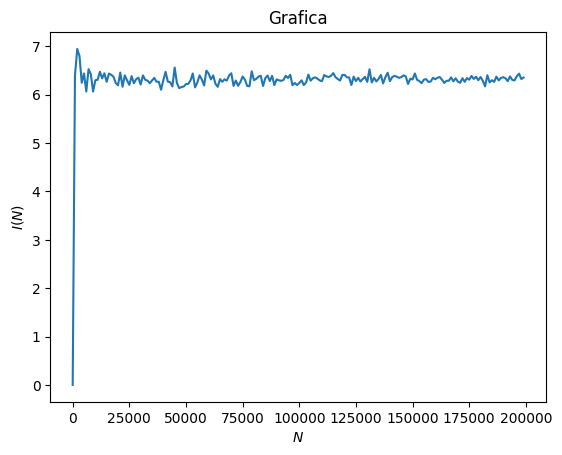

In [36]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()

N1 = np.arange(1,200000,1000) # con saltos de 10 en 10

y = (I(0,1,100,N1[i],g1) for i in range(len(N1)))

plt.title('Grafica')
plt.xlabel('$N$')
plt.ylabel('$I(N)$')
plt.plot(N1,list(y))
plt.show()

Para la segunda integral se tiene el siguinete resultado si $a=0,b=1,c=100$ y $N=500000$

In [ ]:
from math import sqrt

def I(a,b,c,n,f):
  s = 0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      s+=1
  return c*(b-a)*(s/n)

g2 = lambda x: sqrt((1-x**2)**3) # funcion del inciso (b)

print("I = {0}".format(I(0,1,100,500000,g2)))

I = 0.5928
